# Mushroom Classification using Machine Learning

This notebook will explore how data scientists can use machine learning to categorize items based on characteristics.  The dataset used in this notebook contains hundreds of samples of mushrooms.  Each mushroom has several characteristics, and our goal is to find a way to use these characteristics to build a model that can predict whether a mushroom is poisonous or edible.

## Part 1: Retrieving the dataset

First, we must retrieve the dataset that contains all of the mushroom data.  The cell below contains all of the import statements the model needs.

In [2]:
#Used for formatting the data
import pandas as pd
import numpy as np
from subprocess import check_output
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Used for calculating and drawing the results
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
import matplotlib.pyplot as plt

#Sklearn Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Keras Neural network model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

Next, we will open the file and print the first few lines to get an idea of how the dataset is structured.

In [3]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Part 2: Formatting the data

To use machine learning models, the strings (letters) in the data matrix must be replaced with integers.  We can do this using LabelEncoders.

In [4]:
encoder = LabelEncoder() 
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

As shown in the table below, poisonous mushrooms are now categorized as the value 1, and edible mushrooms are categorized as the value 0.

In [5]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now, we must split the data into its X and y components.  The first column, 'class' is what we are trying to predict (whether the mushroom is poisonous or edible).  The X values are every other column.

In [6]:
#Feature matrix
X=data.drop('class',axis=1)


#Edible status
y=data['class']

Now, the X value shows the features, and the y value shows the edible status:

In [7]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [8]:
y[0:5]

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

The next step is to split the data into training data and testing data.  Training data is used to generate the predictive model.  Test data refers to samples that the model hasn't been trained on, and is used to tune the model.
This program will also use a third group of data, called a validation set.  This set is a group of test data that is only used once.  When tuning the model to maximize the accuracy of the AI on the test set, the developer is adding bias to the the AI.  To verify that the AI is not overfitting the data, the programmer will test the AI's accuracy on data both the AI and the user have never seen before.

For this model, 20% (1625 samples) of the total samples will be used for validation data, 8% (650 samples) will be used for test data, and 72% (5849 samples) will be used for training data.

In [9]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print(X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape,
    X_validation.shape,
    y_validation.shape,sep="\n")

(5849, 22)
(5849,)
(650, 22)
(650,)
(1625, 22)
(1625,)


## Part 3: Logistic Regression Experiment

For predicting the edible status, our first model will be Logistic Regression.  The results below show that this model is over 96% accurate in predicting whether each mushroom is edible or not.  Because the consequences of eating a poison mushroom are more severe that throwing away an edible mushroom, poison mushrooms should have a much higher class weight.

In [10]:
#The poison class has a weight 7 times edible mushrooms to reduce the chance
#of a poison mushroom being falsely identified.
log_reg = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 7})
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Model Testing Accuracy' , accuracy_score(y_test, y_pred))

Logistic Model Testing Accuracy 0.9615384615384616


In addition to accuracy, we will draw confusion matrices for each model's results.  This will let us see where the majority of the model's error is coming from.

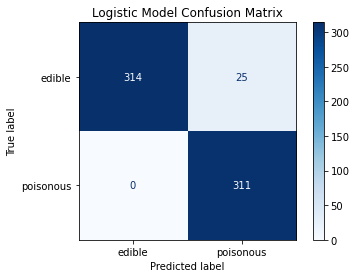

In [11]:
conf = plot_confusion_matrix(log_reg, X_test, y_test, 
                      display_labels=['edible','poisonous'],
                      cmap=plt.cm.Blues)
conf.ax_.set_title("Logistic Model Confusion Matrix")
plt.show()

## Part 4: Artificial Neural Network Example

Next, we will try predicting using an Artificial Neural Net.  This network will have 4 layers, and will be trained over 200 epochs.

In [12]:
neural_net = Sequential()#10,19,10
neural_net.add(Dense(10, kernel_initializer='uniform', activation= 'relu'))
neural_net.add(Dense(19, kernel_initializer='uniform', activation= 'relu'))
neural_net.add(Dense(10, kernel_initializer='uniform', activation= 'relu'))

neural_net.add(Dense(1, kernel_initializer= 'uniform', activation='sigmoid'))
neural_net.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
neural_net.fit(X_train,y_train,batch_size=15,epochs=70)

Epoch 1/70
390/390 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.7976
Epoch 2/70
390/390 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9198
Epoch 3/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9378
Epoch 4/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9467
Epoch 5/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9533
Epoch 6/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.9566
Epoch 7/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9602
Epoch 8/70
390/390 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9655
Epoch 9/70
390/390 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9708
Epoch 10/70
390/390 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9761

In [14]:
y_pred=neural_net.predict(X_test)
y_pred=(y_pred>0.5)
print('Neural Network Testing Accuracy', accuracy_score(y_test, y_pred))

Neural Network Testing Accuracy 1.0


Below is the confusion matrix for the neural net.  As shown in the matrix below, the neural net should have far fewer falsely identified values than the logistic regression model.

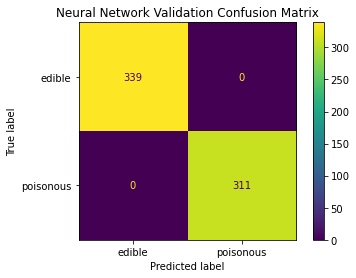

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

conf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                             display_labels=['edible','poisonous'])

conf.plot()
plt.title("Neural Network Validation Confusion Matrix")
plt.show()

## Part 5: K-Nearest Neighbors Experiemtn

Our third alogrithm will be a K-Nearest Neighbors classifier.  With some parameter tuning, the model has a testing accuracy of 100%!

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('K Nearest Neighbors Testing Accuracy', accuracy_score(y_test, y_pred))

K Nearest Neighbors Testing Accuracy 1.0


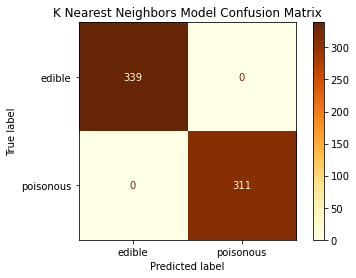

In [17]:
conf = plot_confusion_matrix(knn_classifier, X_test, y_test, 
                      display_labels=['edible','poisonous'],
                      cmap=plt.cm.YlOrBr)
conf.ax_.set_title("K Nearest Neighbors Model Confusion Matrix")
plt.show()

## Part 6: Verify Models With Validation Set

As mentioned earlier, validation sets are used as single-use testing data to make sure a model hasn't been overfitted while tuning.  The following code creates confusion matrices of each of the 3 algorithms we built.

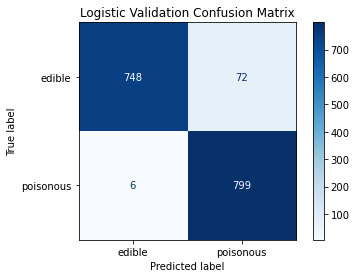

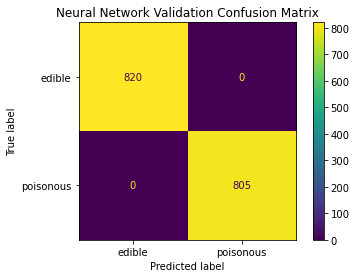

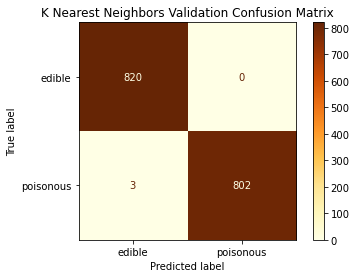

In [18]:
#Display results for the logistic validation set:
conf_log = plot_confusion_matrix(log_reg, X_validation, y_validation, 
                      display_labels=['edible','poisonous'],
                      cmap=plt.cm.Blues)
conf_log.ax_.set_title("Logistic Validation Confusion Matrix")
plt.show()

#Display results for the neural network validation set:
neural_network_validation_y_pred=neural_net.predict(X_validation)
neural_network_validation_y_pred=(neural_network_validation_y_pred>0.5)
conf_neural_net = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_validation, neural_network_validation_y_pred),
                             display_labels=['edible','poisonous'])
conf_neural_net.plot()
plt.title("Neural Network Validation Confusion Matrix")

#Display results for the KNN validation set:
conf_knn = plot_confusion_matrix(knn_classifier, X_validation, y_validation, 
                      display_labels=['edible','poisonous'],
                      cmap=plt.cm.YlOrBr)
conf_knn.ax_.set_title("K Nearest Neighbors Validation Confusion Matrix")
plt.show()

Ideally, the results for the validation set predictions should be similar to the testing set results.  If the results are significantly worse for the validation set, the model's training data may not cover enough cases and needs more data to avoid overfitting.

## Part 7: Explaining Models with SHAP

While different algorithms can produce accurate predictions, being able to draw out models can help convince stakeholders of the model's effectiveness.  For this project, the person who commissioned the mushroom AI would likely want to know which factors influenced the model's predictions and how.
One way to explain a model's behavior is with a process called SHAP (SHapley Additive exPlanations).

In [80]:
import shap  # package used to calculate Shap values
from sklearn.ensemble import RandomForestClassifier

#Create a fourth type of classifier, called a Random Forest.  This model involves creating many
#Decision tree-based structures, which are naturally transparent.
rf_classifier = RandomForestClassifier(random_state=0, n_estimators=10,max_depth=2)
rf_classifier.fit(X_train, y_train)

#Create a shap explainer:
explainer = shap.TreeExplainer(my_model)

#The index is any number within the length of test samples.
#The shap's output will be this test sample's predicted value with info on how every feature
#influenced the prediction.
sample_to_draw = X_test.iloc[3]
shap_values = explainer.shap_values(sample_to_draw)

#First, we will plot a single test sample.
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1],sample_to_draw)

The figure above shows how the Random Forest model predicts the value of a test sample.  Features that are red mean that the sample's value for that feature suggests the mushroom is poisonous, while blue features mean the samples' value suggests the mushroom is edible.  The larger the box for each feature, the more influential that feature is.

Next, we will use SHAP to draw the model's predictive process for many samples at the same time.
The chart we will draw will show the expected value of a number of samples, and how those predictions change as the values of new features are analyzed.

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
5274          5            3          4        0     7                1   
213           5            0          3        0     5                1   
7560          5            0          3        0     5                1   
7981          3            3          1        0     4                0   
5616          2            3          9        0     2                1   
6489          5            2          2        0     2                1   
2977          5            0          3        1     5                1   
6331          5            0          3        0     5                1   
1068          5            0          4        1     5                1   
6546          2            2          4        0     8                1   
5551          2            3          6        0     5                1   
7989          2            2          4        0     8                1   
1798          2          

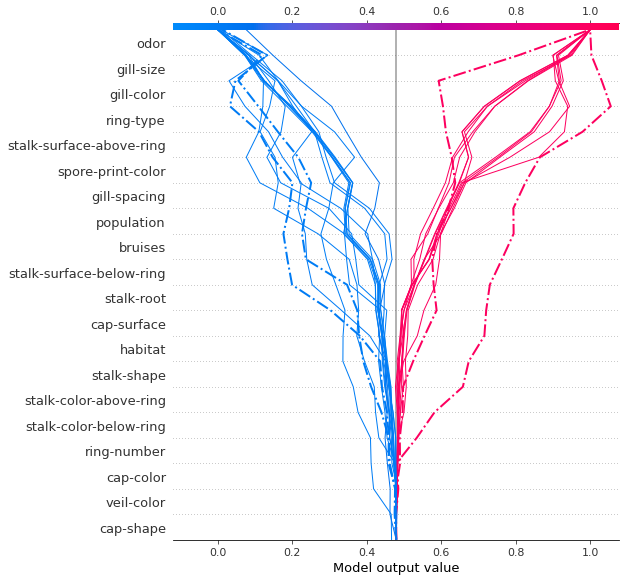

In [98]:
#This time, we will draw the first 30 test samples
select = range(min(30,len(y_test)))
sample_to_draw = X_test.iloc[select]
shap_values = explainer.shap_values(sample_to_draw)

#To help tune the model, we will draw inaccurate predictions with dotted lines.
misclassified = []
y_pred = list(rf_classifier.predict(X_test));
y_actual = list(y_test)

for i in select:
    if y_pred[i] != y_actual[i]:
        misclassified.append(i)
print("Misclassified samples:", len(misclassified))

#The chart will show how the prediced status of each sample changes based on each feature,
#starting from the bottom.
shap.decision_plot(explainer.expected_value[1], shap_values[1],sample_to_draw, highlight=misclassified)

In the figure above, all samples start at the bottom with an expected value of 0.5 (neutral).  At each step going up, the predicted values fan out because each sample's value for that feature influences its expected edible status.  This model also shows exactly which samples of the model are not being predicted correctly, which is helpful for parameter tuning.
If only a single sample is plotted on this type of graph, the values for each feature will be drawn next to the line.
Modifying the Random Forest model's parameters such as increasing the number of estimators or the maximum depth should lead to near perfect predictive results.

## Part 8: Conclusions

First, we learned about how to read and format data to be used in Machine Learning algorithms.  This included strategies such as splitting a dataset into training, testing, and validation sets.

Next, we created several Machine Learning models and tuned the parameters to optimize the predictions on the test data.  Using confusion plots, we compared the results of each algorithm.

Then, we ran each model on the validation set, which was data we have never seen before.  This method simulated how well our model will perform in a more realistic scenario.

Lastly, we learned some basics about drawing how each feature in a model influences a model's decision using SHAP.